# Ejercicio 7

$$
f(x) = \begin{cases} 
\frac1x & 1\le x\le e\\
0 & c.c.\\
\end{cases}
$$

$$\begin{align}
F(x) &= \int_1^x \frac1t dt \ \ \ x \le e \\
&= ln(x)
\end{align}$$

In [52]:
import matplotlib.pyplot as plt
import random as rnd
import numpy as np

def fprob(x):
    ''' Funcion de densidad de x 
    '''
    return 1/x if 1 <= x <= np.e else 0

def fdist(x):
    ''' Funcion de probabilidad de c 
    '''
    return np.log(x)

def tinv():
    ''' Simulacion de X por transformacion invertida
    '''
    u = rnd.random()
    return np.e**u



In [53]:
import time

def get_probs(g, nsim, *args):
    rnd.seed(1000)
    acc = []

    start = time.perf_counter()
    for _ in range(nsim):
        r = g(*args)
        acc.append(r)

    end = time.perf_counter()

    perf = end - start
    return acc, perf

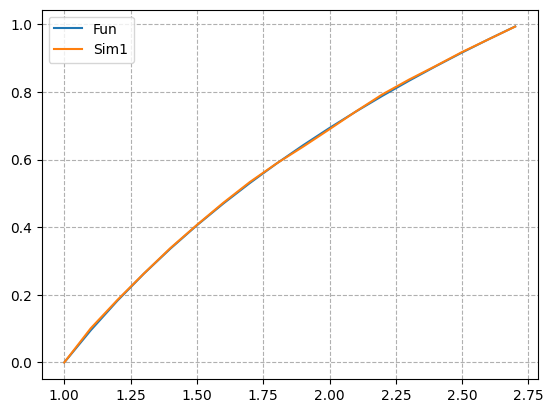

In [54]:
xs = np.arange(1,np.e,0.1)
ys = [ fdist(x) for x in xs ] 
plt.plot(xs,ys, label=f'Fun')

nsim = 10_000

acc, perf = get_probs(tinv, nsim)

ys = []
for i in xs:
    f_le = [ 1 if x <= i else 0 for x in acc ]
    v = sum(f_le) / nsim
    ys.append(v)

plt.plot(xs,ys, label=f'Sim1')

plt.grid(linestyle = '--')
plt.legend()
plt.show()
